In [710]:
#Target variable: life expectancy
#goal: find the variables that affect the target variable. Specifically variables that increase and decrease the 
#life expectancy

In [711]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [712]:
df=pd.read_csv("/Users/laurakim/Downloads/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [713]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [714]:
df.shape

(2938, 22)

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [716]:
df.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [717]:
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [718]:
#I will go through each column with missing values labeled as NaN.  Then I will assess their values, such as 
#extreme values, zeroes.  

In [719]:
df.loc[df['Life expectancy '].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [720]:
#df.loc[df['Country']=='Cook Islands']

In [721]:
#df.loc[df['Country']=='Dominica']

In [722]:
#df.loc[df['Country']=='Marshall Islands']

In [723]:
#df.loc[df['Country']=='Monaco']

In [724]:
#df.loc[df['Country']=='Nauru']

In [725]:
#df.loc[df['Country']=='Niue']

In [726]:
#df.loc[df['Country']=='Palau']

In [727]:
#df.loc[df['Country']=='Saint Kitts and Nevis']

In [728]:
#df.loc[df['Country']=='San Marino']

In [729]:
#df.loc[df['Country']=='Tuvalu']

In [730]:
#Will drop those 10 rows, because those ten countries do not seem to have well known demographic info to fill in the
#missing values.  Furthermore, they only account for less than 1% of Life expectancy and Adult mortality columns.    

In [731]:
df1=df.dropna(subset=['Life expectancy '])
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [732]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             6.591530
percentage expenditure              0.000000
Hepatitis B                        18.886612
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [733]:
df.loc[(df['Country']=='South Sudan') & (df['Alcohol'].isnull())]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


In [734]:
#from the alcohol column, some of 2015's values are missing.  I will replace them with their previous year's value.
#method='bfill' because 2015 is at the top, so fill from bottom up.

In [735]:
df1['Alcohol'].fillna(method='bfill', inplace=True)

In [736]:
#actually South Suden is one of the countries with high alcohol consumption, about 11.0 in 2016.
#will replace them with that value.

In [737]:
df1.iloc[2409, 6]=11.0
df1.iloc[2410, 6]=11.0
df1.iloc[2411, 6]=11.0
df1.iloc[2412, 6]=11.0
df1.iloc[2413, 6]=11.0
df1.iloc[2414, 6]=11.0
df1.iloc[2415, 6]=11.0
df1.iloc[2416, 6]=11.0
df1.iloc[2417, 6]=11.0
df1.iloc[2418, 6]=11.0
df1.iloc[2419, 6]=11.0
df1.iloc[2420, 6]=11.0
df1.iloc[2421, 6]=11.0
df1.iloc[2422, 6]=11.0
df1.iloc[2423, 6]=11.0
df1.iloc[2424, 6]=11.0

In [738]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                        18.886612
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [739]:
hep_b_missing=df1.loc[df1['Hepatitis B'].isnull()]
hep_b_missing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9
61,Angola,2002,Developing,46.5,391.0,96,2.82,24.037942,NaN,11945,...,37.0,3.63,41.0,2.3,711.181716,17572649.0,1.5,1.5,0.401,5.5
62,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,NaN,9046,...,41.0,5.38,38.0,2.1,526.168743,16983266.0,1.7,1.7,0.391,5.1


In [740]:
hep_b_missing['Country'].unique()

array(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Australia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Congo',
       'Croatia', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland',
       'Gabon', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Jamaica', 'Japan', 'Kenya',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania',
       'Montenegro', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Netherlands', 'Niger', 'Nigeria', 'Norway', 'Pakistan', 'Panam

In [741]:
hep_b_missing['Country'].nunique()

98

In [742]:
#Europe: Six countries have not yet introduced universal immunization against hepatitis B: 
#Denmark, Finland, Iceland, Norway, Sweden and United Kingdom. 
#They have very low endemicity and consider hepatitis B to be a limited public health problem, 
#thus not justifying additional expense. 
#I will replace those six countries with hep B vaccine % as zero.
#for all the other missing hepatitis B values, I will use 'ffill' as earlier years are missing their values.

In [743]:
#df1.loc[(df1['Country']=='Denmark') & (df1['Hepatitis B'].isnull())]

In [744]:
#df1.loc[(df1['Country']=='Finland') & (df1['Hepatitis B'].isnull())]

In [745]:
#df1.loc[(df1['Country']=='Iceland') & (df1['Hepatitis B'].isnull())]

In [746]:
#df1.loc[(df1['Country']=='Norway') & (df1['Hepatitis B'].isnull())]

In [747]:
#df1.loc[(df1['Country']=='Sweden') & (df1['Hepatitis B'].isnull())]

In [748]:
#df1.loc[(df1['Country']=='United Kingdom of Great Britain and Northern Ireland') & (df1['Hepatitis B'].isnull())]

In [749]:
df1.iloc[737, 8]=0
df1.iloc[738, 8]=0
df1.iloc[739, 8]=0
df1.iloc[740, 8]=0
df1.iloc[741, 8]=0
df1.iloc[742, 8]=0
df1.iloc[743, 8]=0
df1.iloc[744, 8]=0
df1.iloc[745, 8]=0
df1.iloc[746, 8]=0
df1.iloc[747, 8]=0
df1.iloc[748, 8]=0
df1.iloc[749, 8]=0
df1.iloc[750, 8]=0
df1.iloc[751, 8]=0
df1.iloc[752, 8]=0
df1.iloc[914, 8]=0
df1.iloc[915, 8]=0
df1.iloc[916, 8]=0
df1.iloc[917, 8]=0
df1.iloc[918, 8]=0
df1.iloc[919, 8]=0
df1.iloc[920, 8]=0
df1.iloc[921, 8]=0
df1.iloc[922, 8]=0
df1.iloc[923, 8]=0
df1.iloc[924, 8]=0
df1.iloc[925, 8]=0
df1.iloc[926, 8]=0
df1.iloc[927, 8]=0
df1.iloc[928, 8]=0
df1.iloc[929, 8]=0
df1.iloc[1170, 8]=0
df1.iloc[1171, 8]=0
df1.iloc[1172, 8]=0
df1.iloc[1173, 8]=0
df1.iloc[1174, 8]=0
df1.iloc[1175, 8]=0
df1.iloc[1176, 8]=0
df1.iloc[1177, 8]=0
df1.iloc[1178, 8]=0
df1.iloc[1179, 8]=0
df1.iloc[1180, 8]=0
df1.iloc[1181, 8]=0
df1.iloc[1182, 8]=0
df1.iloc[1183, 8]=0
df1.iloc[1184, 8]=0
df1.iloc[1185, 8]=0
df1.iloc[1910, 8]=0
df1.iloc[1911, 8]=0
df1.iloc[1912, 8]=0
df1.iloc[1913, 8]=0
df1.iloc[1914, 8]=0
df1.iloc[1915, 8]=0
df1.iloc[1916, 8]=0
df1.iloc[1917, 8]=0
df1.iloc[1918, 8]=0
df1.iloc[1919, 8]=0
df1.iloc[1920, 8]=0
df1.iloc[1921, 8]=0
df1.iloc[1922, 8]=0
df1.iloc[1923, 8]=0
df1.iloc[1924, 8]=0
df1.iloc[1925, 8]=0
df1.iloc[2510, 8]=0
df1.iloc[2511, 8]=0
df1.iloc[2512, 8]=0
df1.iloc[2513, 8]=0
df1.iloc[2514, 8]=0
df1.iloc[2515, 8]=0
df1.iloc[2516, 8]=0
df1.iloc[2517, 8]=0
df1.iloc[2518, 8]=0
df1.iloc[2519, 8]=0
df1.iloc[2520, 8]=0
df1.iloc[2762, 8]=0
df1.iloc[2763, 8]=0
df1.iloc[2764, 8]=0
df1.iloc[2765, 8]=0
df1.iloc[2766, 8]=0
df1.iloc[2767, 8]=0
df1.iloc[2768, 8]=0
df1.iloc[2769, 8]=0
df1.iloc[2770, 8]=0
df1.iloc[2771, 8]=0
df1.iloc[2772, 8]=0
df1.iloc[2773, 8]=0
df1.iloc[2774, 8]=0
df1.iloc[2775, 8]=0
df1.iloc[2776, 8]=0
df1.iloc[2777, 8]=0

In [750]:
df1['Hepatitis B'].fillna(method='ffill', inplace=True)

In [751]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [752]:
#df1.loc[df1[' BMI '].isnull()]

In [753]:
#http://gamapserver.who.int/gho/interactive_charts/ncd/risk_factors/bmi/tablet/atlas.html
#According to the website above, for South Sudan and Sudan, their mean BMI is 24.7 as of today.  
#I will replace them with that value.

In [754]:
df1[' BMI '].fillna(24.7, inplace=True)

In [755]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                0.000000
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [756]:
df1.loc[df1['Polio'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,9.0,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,9.0,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,9.0,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,9.0,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,9.0,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,9.0,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,0.01,0.000000,31.0,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,0.01,0.000000,31.0,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,0.01,0.000000,31.0,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,0.01,0.000000,31.0,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [757]:
#https://www.who.int/gho/immunization/poliomyelitis/en/
#Will fill missing values for South Sudan polio with the data available from this website
#for Montenegro and Timor-Leste, polio missing data are not available; will use ffill to fill the values with
#the closest year's value available.

In [758]:
df1['Polio'].fillna(method='ffill', inplace=True)

In [759]:
df1.iloc[2414, 12]=90.0   
df1.iloc[2415, 12]=81.0
df1.iloc[2416, 12]=85.0
df1.iloc[2417, 12]=84.0
df1.iloc[2418, 12]=77.0
df1.iloc[2419, 12]=78.0
df1.iloc[2420, 12]=74.0
df1.iloc[2421, 12]=69.0
df1.iloc[2422, 12]=60.0
df1.iloc[2423, 12]=66.0
df1.iloc[2424, 12]=62.0

In [760]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                0.000000
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [761]:
df1.loc[df1['Diphtheria '].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,9.0,0,...,9.0,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,9.0,0,...,9.0,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,9.0,0,...,9.0,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,9.0,0,...,9.0,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,9.0,0,...,9.0,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,9.0,0,...,9.0,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,0.01,0.000000,31.0,0,...,66.0,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,0.01,0.000000,31.0,0,...,66.0,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,0.01,0.000000,31.0,0,...,66.0,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,0.01,0.000000,31.0,0,...,66.0,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [762]:
#looks like this is the same as Polio case. Will do the same

In [763]:
df1['Diphtheria '].fillna(method='ffill', inplace=True)

In [764]:
df1.iloc[2414, 14]=90.0   
df1.iloc[2415, 14]=81.0
df1.iloc[2416, 14]=86.0
df1.iloc[2417, 14]=84.0
df1.iloc[2418, 14]=78.0
df1.iloc[2419, 14]=78.0
df1.iloc[2420, 14]=74.0
df1.iloc[2421, 14]=69.0
df1.iloc[2422, 14]=60.0
df1.iloc[2423, 14]=66.0
df1.iloc[2424, 14]=62.0

In [765]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                0.000000
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   7.718579
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [766]:
#df1['Total expenditure']=df1['Total expenditure'].fillna(df1.groupby('Country')['Total expenditure'].transform('mean'))

In [767]:
df1.loc[df1['Total expenditure'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.01,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,8.33,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,8.56,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,7.93,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,3.91,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,9.71,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,12.32,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,0.01,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,9.45,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,1.57,0.0,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


In [768]:
#only the 2015 data is missing for total expenditure.  use bfill

In [769]:
df1['Total expenditure'].fillna(method='bfill', inplace=True)

In [770]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                0.000000
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   0.000000
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [771]:
#the rest seem to have a large number of missing data... I will group them by country and fill the missing data
#with its country's mean value.

In [772]:
#df1['GDP']=df1['GDP'].fillna(df1.groupby('Country')['GDP'].transform('mean'))

In [773]:
#above code doesn't work because the following countries(25 of them) do not have any GDP info from 2000-2015 
#Too many data to look up...Will look up their 2015 value and then do ffill

In [774]:
#gdp_missing=df1.loc[df1['GDP'].isnull()]
#gdp_missing['Country'].unique()

In [775]:
df1.index[df1['Country']=='The former Yugoslav republic of Macedonia']

Int64Index([2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595,
            2596, 2597, 2598, 2599, 2600],
           dtype='int64')

In [776]:
df1.iloc[160,16]=30483.82
df1.iloc[2890,16]=1285.56
df1.iloc[2874,16]=2065.17
df1.iloc[304,16]=3077.03
df1.iloc[2794,16]=56443.82
df1.iloc[608,16]=497.63
df1.iloc[2087,16]=27105.08
df1.iloc[2168,16]=9306.36
df1.iloc[2329,16]=16132.86
df1.iloc[802,16]=3547.71
df1.iloc[432,16]=1434.33
df1.iloc[689,16]=17715.62
df1.iloc[705,16]=1013.00
df1.iloc[721,16]=497.63
df1.iloc[962,16]=458.97
df1.iloc[1218,16]=4862.30
df1.iloc[1410,16]=1121.08
df1.iloc[1426,16]=2159.43
df1.iloc[1699,16]=3018.01
df1.iloc[2103,16]=1832.50
df1.iloc[2184,16]=6913.04
df1.iloc[2585,16]=4834.14
df1.iloc[2762,16]=44305.55
df1.iloc[2778,16]=872.20
df1.iloc[2858,16]=6890.00

In [777]:
df1['GDP'].fillna(method='ffill', inplace=True)

In [778]:
df1.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         0.000000
Measles                             0.000000
 BMI                                0.000000
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   0.000000
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                 0.000000
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [779]:
#looks like same thing is going on for population as it did for GDP... but 41 countries...

In [780]:
pop_missing=df1.loc[df1['Population'].isnull()]
pop_missing['Country'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Congo', 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [781]:
df1.index[df1['Country']=='Gambia']

Int64Index([962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
            975, 976, 977],
           dtype='int64')

In [782]:
df1.iloc[64,17]=99923
df1.iloc[160,17]=38683
df1.iloc[176,17]=1372000
df1.iloc[208,17]=284217
df1.iloc[304,17]=10720000
df1.iloc[368,17]=417542
df1.iloc[432,17]=23110000
df1.iloc[608,17]=76200000
df1.iloc[657,17]=11460000
df1.iloc[689,17]=10540000
df1.iloc[705,17]=25240000
df1.iloc[721,17]=76200000
df1.iloc[802,17]=93780000
df1.iloc[850,17]=5200000
df1.iloc[962,17]=1978000
df1.iloc[1042,17]=106823
df1.iloc[1218,17]=79360000
df1.iloc[1394,17]=3936000
df1.iloc[1410,17]=5957000
df1.iloc[1426,17]=6664000
df1.iloc[1506,17]=6235000
df1.iloc[1699,17]=104433
df1.iloc[1845,17]=4596000
df1.iloc[1926,17]=4200000
df1.iloc[2071,17]=2482000
df1.iloc[2087,17]=51010000
df1.iloc[2103,17]=3554000
df1.iloc[2168,17]=177206
df1.iloc[2184,17]=109455
df1.iloc[2233,17]=31560000
df1.iloc[2313,17]=5535000
df1.iloc[2329,17]=5421000
df1.iloc[2377,17]=13910000
df1.iloc[2585,17]=2069000
df1.iloc[2746,17]=9154000
df1.iloc[2762,17]=65110000
df1.iloc[2778,17]=53880000
df1.iloc[2794,17]=321000000
df1.iloc[2858,17]=31160000
df1.iloc[2874,17]=93570000
df1.iloc[2890,17]=26920000

In [783]:
df1['Population'].fillna(method='ffill', inplace=True)

In [784]:
df1.isnull().mean()*100

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
 BMI                               0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.000000
Population                         0.000000
 thinness  1-19 years              1.092896
 thinness 5-9 years                1.092896
Income composition of resources    5.464481
Schooling                          5.464481
dtype: float64

In [785]:
df1.loc[df1[' thinness  1-19 years'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,0.01,0.000000,31.0,878,...,41.0,2.74,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,0.01,46.074469,31.0,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,0.01,47.444530,31.0,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,0.01,38.338232,31.0,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,0.01,0.000000,31.0,1256,...,66.0,9.30,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,0.01,0.000000,31.0,0,...,66.0,9.30,61.0,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,0.01,0.000000,31.0,0,...,66.0,9.30,61.0,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,0.01,0.000000,31.0,0,...,66.0,9.30,61.0,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,0.01,0.000000,31.0,0,...,66.0,9.30,61.0,4.2,1678.711862,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,11.00,0.000000,31.0,0,...,66.0,9.30,61.0,4.1,1678.711862,8468152.0,NaN,NaN,0.000,0.0


In [786]:
df1[' thinness  1-19 years'].min()

0.1

In [787]:
#The prevalence of acute malnutrition in preschool children is extraordinarily high in
#Southern Sudan – at around 22%, consistently and substantially higher than the WHO
#cut-off for nutrition emergencies of 15%. 

In [788]:
#since those two areas have acute malnutrition compared to other countries, I will replace their missing values
#with the minimum value in that column

In [789]:
df1[' thinness 5-9 years'].unique()

array([17.3, 17.5, 17.7, 18. , 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5,
       19.7, 19.9,  2.2,  2.4,  2.5,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
        1.9,  2. ,  2.1,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  8.2,
        8.3,  8.5,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.7,  9.9,  1.1,
        3.3,  3.4,  3.5,  3.6,  0.9,  1. ,  0.6,  0.7,  2.9,  2.8,  3. ,
        3.1,  2.6, 18.3, 18.6, 18.8, 19. , 19.2, 19.4,  2.3,  2.7, 21.1,
       21.3, 21.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  0.8,  6.8,  6.9,
        7.1,  7.3,  7.5,  7.6,  7.8,  8. ,  8.4, 16. , 16.2, 16.5, 16.7,
       17. , 17.8, 18.1, 19.6,  1.2,  3.2,  6.7,  7. ,  7.4, 11.3, 11.8,
       12.2,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  7.7,  7.9,  8.1,
        9.1,  9.3,  9.8, 11.1,  7.2,  8.7,  8.9,  6.6,  9.5, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.9,  6.5,  0.5,  0.4,  4.3,  4.4,  4.6,
        4.7,  4.9,  5. , 12.1, 12.3,  4.5,  4.8, 27.3, 27.4, 27.5, 27.6,
       27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28

In [790]:
df1[' thinness  1-19 years'].fillna(0.1, inplace=True)

In [791]:
df1.isnull().mean()*100

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
 BMI                               0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.000000
Population                         0.000000
 thinness  1-19 years              0.000000
 thinness 5-9 years                1.092896
Income composition of resources    5.464481
Schooling                          5.464481
dtype: float64

In [792]:
income_comp_missing=df1.loc[df1['Income composition of resources'].isnull()]
income_comp_missing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,0.01,0.0,83.0,65,...,81.0,5.72,83.0,1.9,1434.3300,23110000.0,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,1434.3300,23110000.0,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,1434.3300,23110000.0,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,1434.3300,23110000.0,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,1434.3300,23110000.0,6.1,6.0,NaN,NaN
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,81.0,6.32,85.0,3.3,1434.3300,23110000.0,6.3,6.2,NaN,NaN
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,77.0,6.41,81.0,3.7,1434.3300,23110000.0,6.5,6.4,NaN,NaN
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,58.0,6.21,74.0,4.1,1434.3300,23110000.0,6.6,6.6,NaN,NaN
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,75.0,6.35,76.0,5.3,1434.3300,23110000.0,6.8,6.7,NaN,NaN
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,76.0,5.87,77.0,5.8,1434.3300,23110000.0,7.0,6.9,NaN,NaN


In [793]:
df1['Income composition of resources'].describe()

count    2768.000000
mean        0.627419
std         0.210978
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779250
max         0.948000
Name: Income composition of resources, dtype: float64

In [794]:
df1['Schooling'].describe()

count    2768.000000
mean       11.999639
std         3.346440
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

In [795]:
#data is hard to find for the last two columns.  Will replace last two columns with their column median

In [796]:
df1['Income composition of resources'].fillna(0.677000, inplace=True)

In [797]:
df1['Schooling'].fillna(12.300000, inplace=True)

In [798]:
df1.isnull().mean()*100

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
 BMI                               0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.000000
Population                         0.000000
 thinness  1-19 years              0.000000
 thinness 5-9 years                1.092896
Income composition of resources    0.000000
Schooling                          0.000000
dtype: float64

In [799]:
#univariate exploration.  
#for continuous variables, histogram and stats.
#for categorical variables, counts, bar graph and stats.

In [800]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [801]:
df1['Country'].describe()

count        2928
unique        183
top       Nigeria
freq           16
Name: Country, dtype: object

In [802]:
#nothing intereting from the 'country' column.  Each country has 16 rows.

[Text(0, 0, 'Afghanistan'),
 Text(0, 0, 'Albania'),
 Text(0, 0, 'Algeria'),
 Text(0, 0, 'Angola'),
 Text(0, 0, 'Antigua and Barbuda'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Azerbaijan'),
 Text(0, 0, 'Bahamas'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Barbados'),
 Text(0, 0, 'Belarus'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Belize'),
 Text(0, 0, 'Benin'),
 Text(0, 0, 'Bhutan'),
 Text(0, 0, 'Bolivia (Plurinational State of)'),
 Text(0, 0, 'Bosnia and Herzegovina'),
 Text(0, 0, 'Botswana'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Brunei Darussalam'),
 Text(0, 0, 'Bulgaria'),
 Text(0, 0, 'Burkina Faso'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, "Côte d'Ivoire"),
 Text(0, 0, 'Cabo Verde'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Cameroon'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Central African Republic'),
 Text(0, 0, 'Chad'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, '

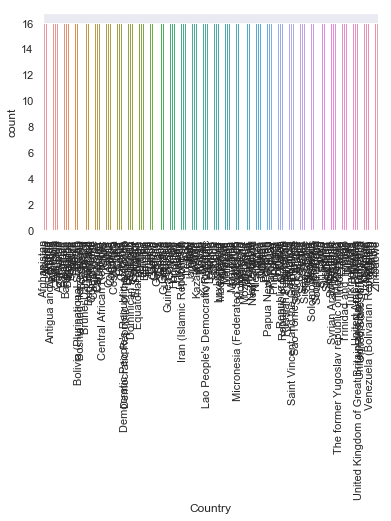

In [803]:
sns.set()
ax=sns.countplot(x=df1['Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [804]:
df1['Status'].describe()

count           2928
unique             2
top       Developing
freq            2416
Name: Status, dtype: object

In [805]:
df1['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Text(0.5, 1.0, 'Total number of developed vs developing countries in the study')

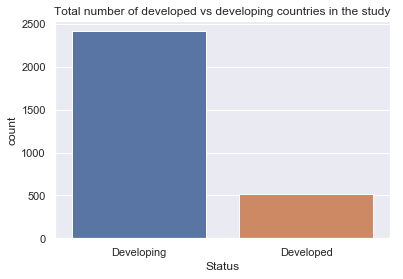

In [806]:
st=sns.countplot(x=df1['Status'])
st.set_title('Total number of developed vs developing countries in the study')

In [807]:
df1[df1['Status']=='Developing'].count()

Country                            2416
Year                               2416
Status                             2416
Life expectancy                    2416
Adult Mortality                    2416
infant deaths                      2416
Alcohol                            2416
percentage expenditure             2416
Hepatitis B                        2416
Measles                            2416
 BMI                               2416
under-five deaths                  2416
Polio                              2416
Total expenditure                  2416
Diphtheria                         2416
 HIV/AIDS                          2416
GDP                                2416
Population                         2416
 thinness  1-19 years              2416
 thinness 5-9 years                2384
Income composition of resources    2416
Schooling                          2416
dtype: int64

In [808]:
df1[df1['Status']=='Developed'].count()

Country                            512
Year                               512
Status                             512
Life expectancy                    512
Adult Mortality                    512
infant deaths                      512
Alcohol                            512
percentage expenditure             512
Hepatitis B                        512
Measles                            512
 BMI                               512
under-five deaths                  512
Polio                              512
Total expenditure                  512
Diphtheria                         512
 HIV/AIDS                          512
GDP                                512
Population                         512
 thinness  1-19 years              512
 thinness 5-9 years                512
Income composition of resources    512
Schooling                          512
dtype: int64

In [809]:
#2416 rows identified as developing. Meaning 151 countries developing. 
2416/16

151.0

In [810]:
#512 rows identified as developed. meaning 32 countries developed.
512/16

32.0

In [811]:
#The bar graph above should be showing same ratio between developing and developed country counts whether it's done
#using the number of rows or the actual number of countries for each category.  
#2416/512 and 151/32 both give the same ratio of 4.71875 between the number of developing and developed country counts

In [812]:
df1['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29be2518>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29bfe630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29bf9b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29bfed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29bfee48>],
 'means': []}

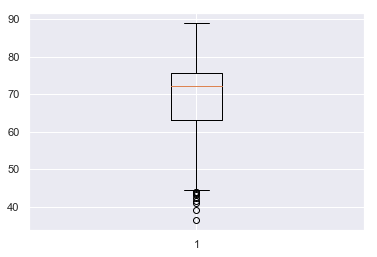

In [813]:
plt.boxplot(df1['Life expectancy '])

In [814]:
lower_whisker=63.10-(1.5*(75.7-63.10))
lower_whisker

44.2

In [815]:
upper_whisker=75.7+(1.5*(75.7-63.10))
upper_whisker

94.60000000000001

In [816]:
df1[df1['Life expectancy ']<].count()

Country                            10
Year                               10
Status                             10
Life expectancy                    10
Adult Mortality                    10
infant deaths                      10
Alcohol                            10
percentage expenditure             10
Hepatitis B                        10
Measles                            10
 BMI                               10
under-five deaths                  10
Polio                              10
Total expenditure                  10
Diphtheria                         10
 HIV/AIDS                          10
GDP                                10
Population                         10
 thinness  1-19 years              10
 thinness 5-9 years                10
Income composition of resources    10
Schooling                          10
dtype: int64

In [992]:
extremely_low_life_expectancy=df1.loc[df1['Life expectancy ']<72]
extremely_low_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010.0,Developing,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009.0,Developing,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008.0,Developing,58.1,287.0,80.0,0.03,25.873925,64.0,1599.0,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007.0,Developing,57.5,295.0,82.0,0.02,10.910156,63.0,1141.0,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006.0,Developing,57.3,295.0,84.0,0.03,17.171518,64.0,1990.0,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [993]:
extremely_low_life_expectancy['Country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Colombia', 'Comoros', 'Congo',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lesotho', 'Liberia',
       'Libya', 'Lithuania', 'Madagascar', 'M

In [819]:
#countries with life expectancy higher than the average of 69.22

avg_life_exp=pd.DataFrame(df1.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)).reset_index()
avg_life_exp.loc[above_avg_life_exp['Life expectancy ']>69.22]

NameError: name 'above_avg_life_exp' is not defined

In [820]:
#countries with life expectancy below the average of 69.22

avg_life_exp.loc[above_avg_life_exp['Life expectancy ']<69.22]

NameError: name 'above_avg_life_exp' is not defined

In [821]:
#The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function.
#histogram
#sns.distplot(x)

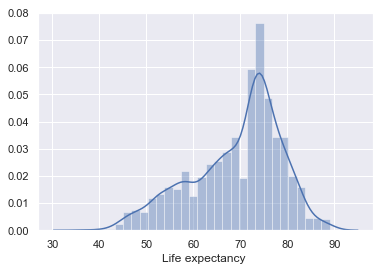

In [822]:
life_expectancy=sns.distplot(df1['Life expectancy '])

In [823]:
#the graph below is the avg life expectancy by country
avg_life_exp_dist=sns.distplot(above_avg_life_exp['Life expectancy '])

NameError: name 'above_avg_life_exp' is not defined

In [824]:
df1['Adult Mortality'].describe()

count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64

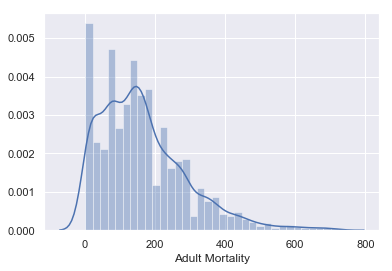

In [825]:
sns.distplot(df1['Adult Mortality'])

In [826]:
#adult mortality rate: likely that a 15 year old adult would die before his/her 60th.  Chance that you will die
#between the age of 15-60.  So lower number= better

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29eb3b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29ec8be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29ec8128>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29ed1320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29ed16a0>],
 'means': []}

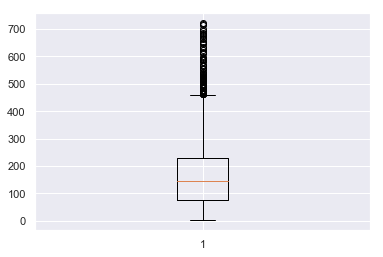

In [827]:
plt.boxplot(df1['Adult Mortality'])

In [828]:
upper_whisker_adult_mortality = 228.0 + 1.5*(228.0-74.0)
upper_whisker_adult_mortality

459.0

In [829]:
high_adult_mortality_rate_countries=df1.loc[df1['Adult Mortality']>459]
high_adult_mortality_rate_countries

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
345,Botswana,2006,Developing,54.8,491.0,2,6.45,76.318679,93.0,6,...,96.0,4.93,96.0,14.4,5374.554867,1884238.00,9.6,9.4,0.610,11.9
346,Botswana,2005,Developing,51.7,566.0,2,6.37,629.842564,92.0,5,...,96.0,5.62,96.0,20.6,5351.253732,1855852.00,1.0,9.9,0.593,11.9
347,Botswana,2004,Developing,48.1,652.0,2,4.90,469.582390,91.0,1,...,96.0,5.56,96.0,28.4,4896.583835,182933.00,1.5,1.4,0.580,11.8
348,Botswana,2003,Developing,46.4,693.0,2,5.51,299.367125,9.0,59,...,96.0,4.65,96.0,31.9,4163.659600,184339.00,1.9,1.8,0.567,11.8
349,Botswana,2002,Developing,46.0,699.0,2,6.41,6.330007,88.0,7,...,97.0,6.47,97.0,34.6,355.618382,1779953.00,11.4,11.3,0.558,11.9
350,Botswana,2001,Developing,46.7,679.0,2,5.48,306.952735,87.0,1,...,97.0,5.73,97.0,37.2,3128.977930,1754935.00,11.8,11.8,0.560,11.8
351,Botswana,2000,Developing,47.8,647.0,2,5.37,250.891648,86.0,2672,...,97.0,4.64,97.0,38.8,3349.688230,172834.00,12.3,12.2,0.559,11.7
442,Côte d'Ivoire,2005,Developing,48.7,466.0,63,3.11,0.000000,76.0,115,...,87.0,5.39,76.0,6.1,1434.330000,23110000.00,7.2,7.1,0.677,12.3
443,Côte d'Ivoire,2004,Developing,48.2,472.0,64,3.08,0.000000,67.0,3466,...,76.0,5.24,67.0,6.5,1434.330000,23110000.00,7.3,7.3,0.677,12.3
444,Côte d'Ivoire,2003,Developing,48.0,473.0,64,3.12,0.000000,63.0,4770,...,68.0,4.65,61.0,6.7,1434.330000,23110000.00,7.5,7.5,0.677,12.3


In [830]:
high_adult_mortality_rate_countries['Country'].unique()

array(['Botswana', "Côte d'Ivoire", 'Central African Republic', 'Eritrea',
       'Haiti', 'Lesotho', 'Malawi', 'Namibia', 'Sierra Leone',
       'South Africa', 'Swaziland', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [831]:
#above are the countries with extremely high adult mortality rate (outliers). 14 countries. 

In [832]:
high_adult_mortality_rate_countries.groupby('Country')['Life expectancy '].mean()

Country
Botswana                    48.785714
Central African Republic    46.500000
Côte d'Ivoire               48.050000
Eritrea                     45.300000
Haiti                       36.300000
Lesotho                     48.546667
Malawi                      47.366667
Namibia                     54.933333
Sierra Leone                43.783333
South Africa                54.216667
Swaziland                   48.220000
Uganda                      48.600000
Zambia                      49.366667
Zimbabwe                    47.800000
Name: Life expectancy , dtype: float64

In [833]:
df1['infant deaths'].describe()

count    2928.000000
mean       30.407445
std       118.114450
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64

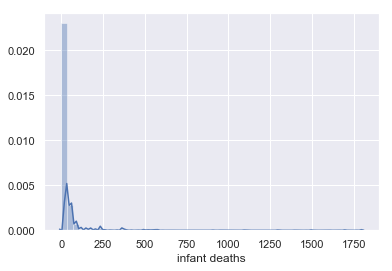

In [834]:
sns.distplot(df1['infant deaths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a0c6978>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a14fba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a14f0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a1582e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a158668>],
 'means': []}

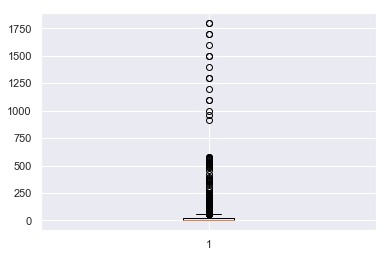

In [835]:
plt.boxplot(df1['infant deaths'])

In [836]:
upper_whisker_infant_death = 22 + 1.5*(22-0)
upper_whisker_infant_death

55.0

In [837]:
high_infant_death_rate_countries=df1.loc[df1['infant deaths']>55]
high_infant_death_rate_countries

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [838]:
high_infant_death_rate_countries['Country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Brazil', "Côte d'Ivoire",
       'Cameroon', 'China', 'Democratic Republic of the Congo', 'Egypt',
       'Ethiopia', 'India', 'Indonesia', 'Kenya', 'Mali', 'Mozambique',
       'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Sudan',
       'Uganda', 'United Republic of Tanzania'], dtype=object)

In [839]:
high_infant_death_rate_countries.groupby('Country')['Life expectancy '].mean()

Country
Afghanistan                         58.193750
Angola                              49.018750
Bangladesh                          69.300000
Brazil                              72.720000
Cameroon                            52.477778
China                               74.262500
Côte d'Ivoire                       50.387500
Democratic Republic of the Congo    55.687500
Egypt                               68.850000
Ethiopia                            59.112500
India                               65.418750
Indonesia                           67.556250
Kenya                               57.086667
Mali                                52.962500
Mozambique                          53.393750
Myanmar                             62.877778
Niger                               52.480000
Nigeria                             51.356250
Pakistan                            64.500000
Philippines                         67.400000
Sudan                               61.825000
Uganda                    

In [840]:
#Above shows the average life expectancy of countries with extremely high infant deaths.
#except Bangladesh, Brazil and China, other countries have below the global avg. life expectancy

In [841]:
df1['Alcohol'].describe()

count    2928.000000
mean        4.539604
std         4.084780
min         0.010000
25%         0.630000
50%         3.630000
75%         7.680000
max        17.870000
Name: Alcohol, dtype: float64

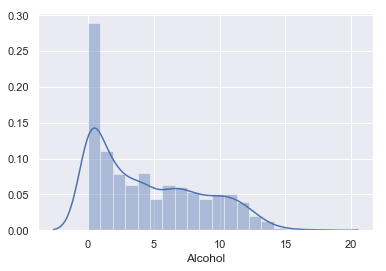

In [842]:
sns.distplot(df1['Alcohol'])

In [843]:
#alcohol consumption ranges from close to zero upto 17.87.  On avg, global alcohol consumption: 4.5396 with std
#4.08478

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a284dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a299fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a299518>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a2a5710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a2a5a90>],
 'means': []}

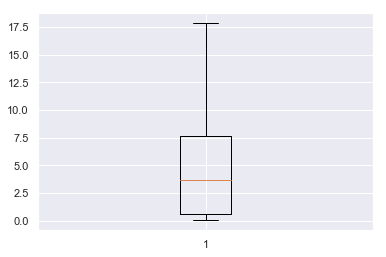

In [844]:
plt.boxplot(df1['Alcohol'])

In [845]:
#I do not see outliers

In [846]:
high_alcohol_consumption=df1.loc[df1['Alcohol']>4.539604]
high_alcohol_consumption

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
23,Albania,2008,Developing,75.3,1.0,1,5.61,36.622068,99.0,0,...,99.0,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0
24,Albania,2007,Developing,75.9,9.0,1,5.58,32.246552,98.0,22,...,99.0,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4
26,Albania,2005,Developing,73.5,15.0,1,5.16,26.993121,98.0,6,...,97.0,6.12,98.0,0.1,279.142931,311487.0,1.8,1.8,0.685,10.8


In [847]:
high_alcohol_consumption['Country'].unique()

array(['Albania', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Haiti',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Rwanda', 'Sain

In [848]:
high_alcohol_consumption.groupby('Country')['Life expectancy '].mean()

Country
Albania                                                 75.700000
Angola                                                  50.263636
Antigua and Barbuda                                     75.056250
Argentina                                               75.156250
Australia                                               81.812500
Austria                                                 81.481250
Bahamas                                                 74.287500
Barbados                                                74.356250
Belarus                                                 69.906250
Belgium                                                 80.681250
Belize                                                  69.268750
Bosnia and Herzegovina                                  76.037500
Botswana                                                53.200000
Brazil                                                  73.381250
Bulgaria                                                72.850000
Bu

In [849]:
#average life expectancy of those countries with above the global average of alcohol consumption: 73.05
high_alcohol_consumption['Life expectancy '].mean()

73.04600638977641

In [850]:
df1['percentage expenditure'].describe()

count     2928.000000
mean       740.321185
std       1990.930605
min          0.000000
25%          4.853964
50%         65.611455
75%        442.614322
max      19479.911610
Name: percentage expenditure, dtype: float64

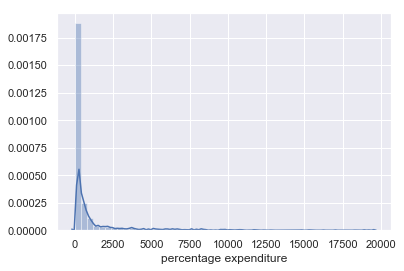

In [851]:
sns.distplot(df1['percentage expenditure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a4e8ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a4fbe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a4fb630>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a504828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a504ba8>],
 'means': []}

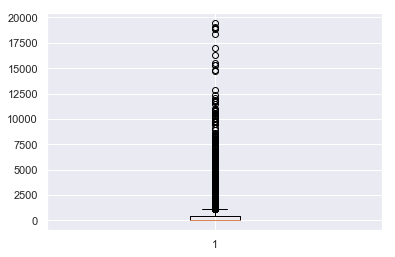

In [852]:
plt.boxplot(df1['percentage expenditure'])

In [853]:
upper_whis_percent_exp=442.61+1.5*(442.61-4.853964)
upper_whis_percent_exp

1099.244054

In [854]:
high_percent_exp=df1.loc[df1['percentage expenditure']>1099.244054]
high_percent_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.296670,99923.0,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,99923.0,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.441970,99923.0,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.349910,99923.0,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.876140,99923.0,3.3,3.3,0.783,14.1
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.938950,99923.0,3.5,3.4,0.000,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,99.0,0,...,99.0,4.53,99.0,0.1,9739.825560,99923.0,3.5,3.5,0.000,0.0
79,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,96.0,0,...,96.0,4.13,95.0,0.1,9875.161736,99923.0,3.7,3.6,0.000,0.0
83,Argentina,2012,Developing,75.9,12.0,9,8.35,1133.558003,91.0,2,...,99.0,5.20,91.0,0.1,12969.771200,4296739.0,1.0,0.9,0.822,17.2
84,Argentina,2011,Developing,75.7,12.0,9,8.11,1504.329462,91.0,3,...,93.0,5.89,91.0,0.1,12726.983600,41656879.0,1.0,0.9,0.816,17.1


In [855]:
high_percent_exp['Country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Denmark', 'Equatorial Guinea', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Seychelles', 'Singapore', 'Slovenia', 'Spain',
       'Suriname', 'Sweden', 'Switzerland', 'Trinidad and Tobago',
       'Turkey', 'United Arab Emirates', 'Uruguay'], dtype=object)

In [856]:
high_percent_exp.groupby('Country')['Life expectancy '].mean()

Country
Antigua and Barbuda     75.237500
Argentina               75.250000
Australia               81.850000
Austria                 81.875000
Bahrain                 75.340000
Barbados                73.800000
Belarus                 71.850000
Belgium                 80.600000
Brazil                  73.800000
Brunei Darussalam       76.837500
Canada                  81.390909
Chile                   80.700000
Colombia                74.450000
Costa Rica              78.640000
Croatia                 76.555556
Cyprus                  79.014286
Denmark                 79.288889
Equatorial Guinea       56.100000
Estonia                 75.533333
Finland                 81.266667
France                  81.781818
Germany                 79.433333
Greece                  82.240000
Hungary                 73.500000
Iceland                 82.220000
Ireland                 80.190909
Israel                  81.128571
Italy                   82.810000
Japan                   82.077778
Kuwait

In [857]:
#except Equatorail Guinea, all those countries with above avg. percentage expenditure have avg. life expectancy
#higher than the global avg. life expectancy of 69.22

In [858]:
low_percent_exp=df1.loc[df1['percentage expenditure']<1099.244054]
low_percent_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [859]:
low_percent_exp['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [860]:
low_percent_exp.groupby('Country')['Life expectancy '].mean()

Country
Afghanistan                                             58.193750
Albania                                                 75.156250
Algeria                                                 73.618750
Angola                                                  49.018750
Antigua and Barbuda                                     74.875000
Argentina                                               75.100000
Armenia                                                 73.400000
Australia                                               81.750000
Austria                                                 80.300000
Azerbaijan                                              70.731250
Bahamas                                                 74.287500
Bahrain                                                 75.900000
Bangladesh                                              69.300000
Barbados                                                74.484615
Belarus                                                 69.628571
Be

In [861]:
low_percent_exp['Life expectancy '].mean()

67.75305238282796

In [862]:
#countries with below avg. percentage expenditure have varying avg. life expectancy
#overall, those countries with below avg. percentage expenditure have avg. life expectancy of 67.75

In [863]:
df1['Hepatitis B'].describe()

count    2928.000000
mean       73.184085
std        31.305933
min         0.000000
25%        63.000000
50%        88.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

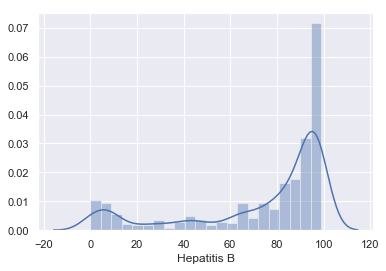

In [864]:
sns.distplot(df1['Hepatitis B'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a7523c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a7fe7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a7f4cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a7feef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a8052b0>],
 'means': []}

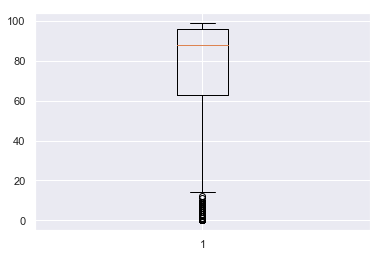

In [865]:
plt.boxplot(df1['Hepatitis B'])

In [866]:
df1['Measles '].describe()

count      2928.000000
mean       2427.855874
std       11485.970937
min           0.000000
25%           0.000000
50%          17.000000
75%         362.250000
max      212183.000000
Name: Measles , dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a82eb00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a8519e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a847ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a851e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a85a4a8>],
 'means': []}

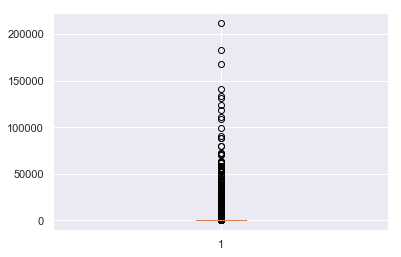

In [867]:
plt.boxplot(df1['Measles '])

In [868]:
#a lot of outliers... I would use median for central tendency

In [869]:
df1[' BMI '].describe()

count    2928.000000
mean       38.087466
std        19.900022
min         1.000000
25%        19.400000
50%        43.000000
75%        56.100000
max        77.600000
Name:  BMI , dtype: float64

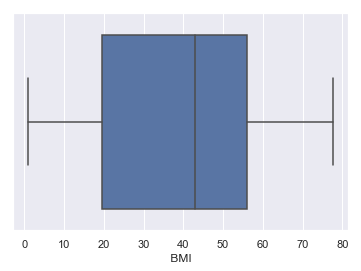

In [870]:
sns.boxplot(df1[' BMI '])

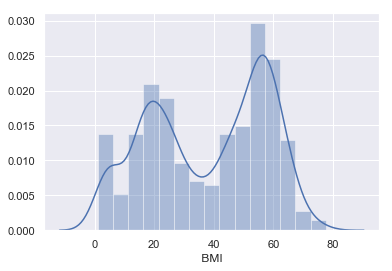

In [871]:
sns.distplot(df1[' BMI '])

In [872]:
#no outliers
#central tendency: average BMI=38.087466.  
#25% of the data rows have BMI below 19.4
#75% of the data rows have BMI below 56

In [873]:
df1['under-five deaths '].describe()

count    2928.000000
mean       42.179303
std       160.700547
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: under-five deaths , dtype: float64

In [874]:
df1['under-five deaths '].median()

4.0

In [875]:
#under-five deaths: number of deaths per 1000 live births
#a lot of outliers above the upper whisker.
#central tendency: median is 4.... 75%, max are so much higher than the median, making mean 42.179303.
#again, not using the mean as the central tendency as there are so many outliers that increases the mean value.
#comparing the countries with under-five deaths close to or below that median to those other countries
#with higher under-five deaths is something that could help us understand what factors affect the overall
#mortality rate

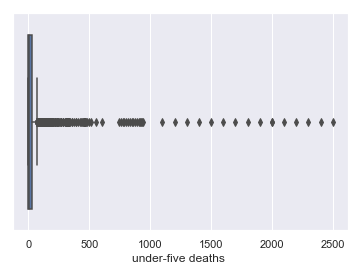

In [876]:
sns.boxplot(df1['under-five deaths '])

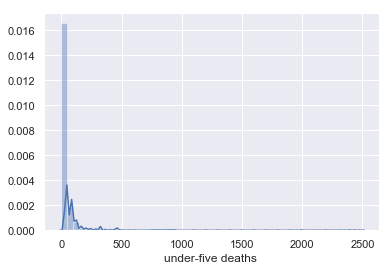

In [877]:
sns.distplot(df1['under-five deaths '])

In [878]:
#below are countries with 'under-five deaths ' above the median leve of 4:
#in the order starting with the highest 'under-five deaths ' rate from 2500 to greater than 4
#total of 92 countries out of 183 countries.

In [879]:
high_under_five_deaths=df1.loc[df1['under-five deaths ']>4].sort_values(by='under-five deaths ', ascending=False)
high_under_five_deaths

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1201,India,2000,Developing,62.5,224.0,1800,0.93,19.266157,6.0,38835,...,57.0,4.26,58.0,0.3,438.864634,1.535912e+06,27.7,28.6,0.489,8.3
1200,India,2001,Developing,62.9,222.0,1800,1.00,19.003406,6.0,51780,...,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
1199,India,2002,Developing,63.3,219.0,1700,1.10,17.812056,6.0,40044,...,58.0,4.40,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
1198,India,2003,Developing,63.7,216.0,1700,1.19,19.480868,6.0,47147,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
1197,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.0,55443,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5


In [880]:
high_under_five_deaths['Country'].unique()

array(['India', 'Nigeria', 'China', 'Pakistan', 'Ethiopia',
       'Democratic Republic of the Congo', 'Bangladesh', 'Indonesia',
       'Uganda', 'United Republic of Tanzania', 'Angola', 'Mozambique',
       'Niger', 'Brazil', 'Afghanistan', 'Kenya', 'Mali', 'Sudan',
       'Cameroon', 'Myanmar', "Côte d'Ivoire", 'Burkina Faso',
       'Philippines', 'Somalia', 'Malawi', 'South Africa', 'Egypt',
       'Chad', 'Zambia', 'Madagascar', 'Yemen', 'Mexico', 'Ghana',
       'Nepal', 'Guinea', 'Haiti', 'Rwanda', 'Turkey', 'Senegal',
       'South Sudan', 'Sierra Leone', 'Zimbabwe',
       'Iran (Islamic Republic of)', 'Viet Nam', 'Burundi', 'Benin',
       'Iraq', 'Uzbekistan', 'Cambodia', 'United States of America',
       'Morocco', 'Russian Federation', 'Central African Republic',
       'Algeria', "Democratic People's Republic of Korea", 'Peru', 'Togo',
       'Guatemala', 'Colombia', 'Thailand', 'Liberia',
       'Bolivia (Plurinational State of)',
       "Lao People's Democratic Republ

In [881]:
df1['Polio'].describe()

count    2928.000000
mean       82.244877
std        23.619937
min         3.000000
25%        77.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

In [882]:
#polio median: 93
#a lot of outliers below the lower whisker.
#I wonder if these outliers are most of the outlier countries identified from the 'under-five deaths ' categories. 
#140 countries with polio below 93.

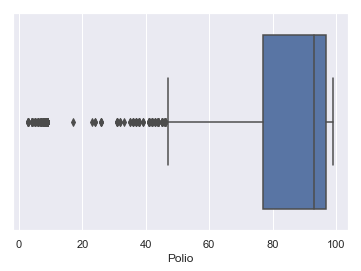

In [883]:
sns.boxplot(df1['Polio'])

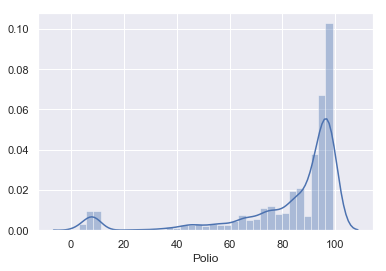

In [884]:
sns.distplot(df1['Polio'])

In [885]:
df1['Total expenditure'].describe()

count    2928.000000
mean        5.968798
std         2.502718
min         0.370000
25%         4.290000
50%         5.780000
75%         7.560000
max        17.600000
Name: Total expenditure, dtype: float64

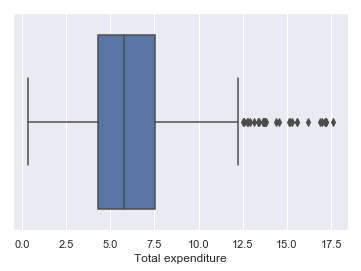

In [886]:
sns.boxplot(df1['Total expenditure'])

In [887]:
df1['Diphtheria '].describe()

count    2928.000000
mean       82.015710
std        23.898153
min         2.000000
25%        78.000000
50%        92.500000
75%        97.000000
max        99.000000
Name: Diphtheria , dtype: float64

In [888]:
#'Diphtheria': looks about the same as Polio.

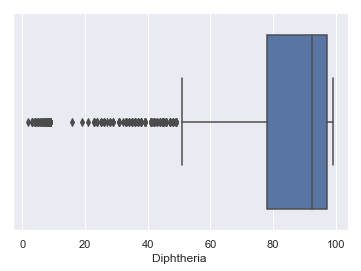

In [889]:
sns.boxplot(df1['Diphtheria '])

In [890]:
df1[' HIV/AIDS'].describe()

count    2928.000000
mean        1.747712
std         5.085542
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name:  HIV/AIDS, dtype: float64

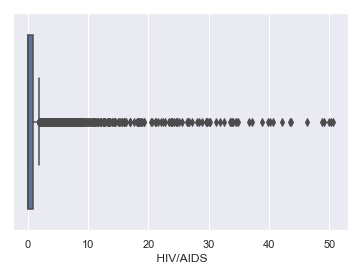

In [891]:
sns.boxplot(df1[' HIV/AIDS'])

In [892]:
#HIV/AIDS column: upto 75% of the data, very low reporting of HIV/AIDS.  
#HIV/AIDS column with values above the upper whisker: would be interesting to look at the time period(higher
#reporting rates during certain time period?), certain countries? highly populated areas? schooling affects this 
#column?, high HIV/AIDS reporting but above average life expectancy due to the countries' advanced treatment? etc?

In [893]:
df1['GDP'].describe()

count      2928.000000
mean       7713.857708
std       14121.356966
min           1.681350
25%         497.630000
50%        1877.508125
75%        6602.820072
max      119172.741800
Name: GDP, dtype: float64

In [894]:
#median is 1877.508125
#but max is so much higher 119172. This is still so much higher than 75% of the data.  

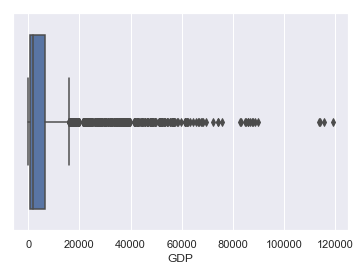

In [895]:
sns.boxplot(df1['GDP'])

In [896]:
df1['Population'].describe()

count    2.928000e+03
mean     1.503195e+07
std      5.728931e+07
min      3.400000e+01
25%      2.491920e+05
50%      1.971594e+06
75%      9.775006e+06
max      1.293859e+09
Name: Population, dtype: float64

In [897]:
#few data with very high population value (about 5 outliers that are all the way
#at the right side of the boxplot below).  Not sure if those points are same countries are all different countries
#as df1 is not grouped by countries.

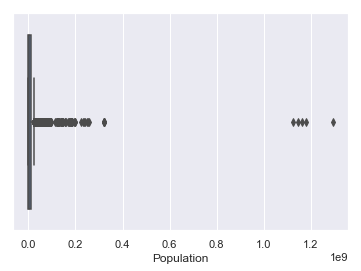

In [898]:
sns.boxplot(df1['Population'])

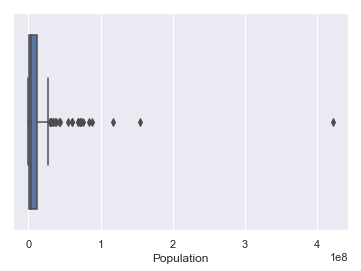

In [899]:
sns.boxplot(df1.groupby(['Country'])['Population'].mean())

In [900]:
#I guess those extreme outliers in the first boxplot for Population was indeed just one country as seen in the
#second boxplot when the data is grouped by countries and the population's average is plotted
#that means except few countries, most countries have population close to the central tendency value

In [901]:
df1[' thinness  1-19 years'].describe()

count    2928.000000
mean        4.798702
std         4.424263
min         0.100000
25%         1.500000
50%         3.300000
75%         7.100000
max        27.700000
Name:  thinness  1-19 years, dtype: float64

In [902]:
df1[' thinness  1-19 years'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  4.9,
        5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.7,  0

In [903]:
df1[' thinness  1-19 years'].dtype

dtype('float64')

In [904]:
df1[df1[' thinness  1-19 years']=='min'].index

TypeError: invalid type comparison

In [905]:
df1.iloc[2457-2473:18]=0.1

In [906]:
df1.iloc[2409-2435:18]=0.1

In [907]:
df1[' thinness  1-19 years'].describe()

count    2928.000000
mean        4.798702
std         4.424263
min         0.100000
25%         1.500000
50%         3.300000
75%         7.100000
max        27.700000
Name:  thinness  1-19 years, dtype: float64

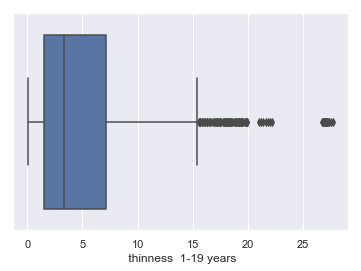

In [908]:
sns.boxplot(df1[' thinness  1-19 years'])

In [909]:
m=pd.DataFrame(df1.groupby(['Country'])[' thinness  1-19 years'].mean())

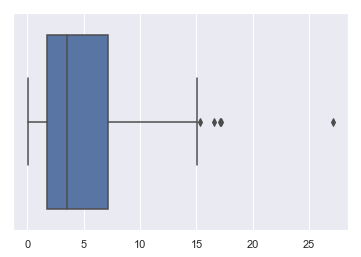

In [910]:
sns.boxplot(m)

In [911]:
m.describe()

,thinness 1-19 years
count,183.000000
mean,4.798702
std,4.103336
min,0.100000
25%,1.731250
50%,3.512500
75%,7.131250
max,27.100000


In [912]:
m.loc[m[' thinness  1-19 years']>15]

,thinness 1-19 years
Country,
Afghanistan,16.58125
Bhutan,17.21875
India,27.10000
Nepal,17.13125
Pakistan,15.08750
Sri Lanka,15.32500


In [913]:
#top four: India, Bhutan, Nepal, Afghanistan

In [914]:
m.loc[m[' thinness  1-19 years']>3.5125]

,thinness 1-19 years
Country,
Afghanistan,16.58125
Algeria,6.09375
Angola,6.19375
Bahrain,6.10625
Bangladesh,13.77500
Barbados,3.95625
Belize,3.55625
Benin,8.25000
Bhutan,17.21875


In [915]:
#out of 183 countries, 6 countries with with high 'thinness 1-19 years' value - outliers
#and 91 countries above the median value

In [916]:
df1[' thinness 5-9 years'].unique()

array([17.3, 17.5, 17.7, 18. , 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5,
       19.7, 19.9,  2.2,  2.4,  2.5,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
        1.9,  2. ,  2.1,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  8.2,
        8.3,  8.5,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.7,  9.9,  1.1,
        3.3,  3.4,  3.5,  3.6,  0.9,  1. ,  0.6,  0.7,  2.9,  2.8,  3. ,
        3.1,  2.6, 18.3, 18.6, 18.8, 19. , 19.2, 19.4,  2.3,  2.7, 21.1,
       21.3, 21.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  0.8,  6.8,  6.9,
        7.1,  7.3,  7.5,  7.6,  7.8,  8. ,  8.4, 16. , 16.2, 16.5, 16.7,
       17. , 17.8, 18.1, 19.6,  1.2,  3.2,  6.7,  7. ,  7.4, 11.3, 11.8,
       12.2,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  7.7,  7.9,  8.1,
        9.1,  9.3,  9.8, 11.1,  7.2,  8.7,  8.9,  6.6,  9.5, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.9,  6.5,  0.5,  0.4,  4.3,  4.4,  4.6,
        4.7,  4.9,  5. , 12.1, 12.3,  4.5,  4.8, 27.3, 27.4, 27.5, 27.6,
       27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28

In [917]:
df1[' thinness 5-9 years'].fillna(0.1, inplace=True)

In [918]:
df1[' thinness 5-9 years'].describe()

count    2928.000000
mean        4.829167
std         4.512367
min         0.100000
25%         1.500000
50%         3.300000
75%         7.200000
max        28.600000
Name:  thinness 5-9 years, dtype: float64

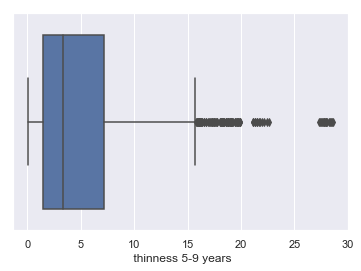

In [919]:
sns.boxplot(df1[' thinness 5-9 years'])

In [920]:
n=pd.DataFrame(df1.groupby(['Country'])[' thinness 5-9 years'].mean())

In [921]:
n.describe()

,thinness 5-9 years
count,183.000000
mean,4.829167
std,4.189185
min,0.100000
25%,1.709375
50%,3.612500
75%,7.015625
max,27.943750


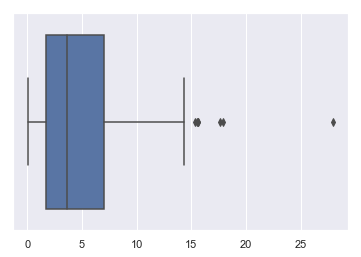

In [922]:
sns.boxplot(n)

In [923]:
n.loc[m[' thinness 5-9 years']>14]

KeyError: ' thinness 5-9 years'

In [924]:
#top four: India, Bhutan, Nepal, Afghanistan

In [925]:
#Polio and Diphtheria follow similar statistical trend
#thinness 1-19 years and thinness 5-19 years follow similar statistical trend
#perhaps just looking at one of the two would help us decrease the number of the columns that we need to look at
#when exploring factors affecting life expectancy

In [926]:
df1['Income composition of resources'].describe()

count    2928.000000
mean        0.630128
std         0.205440
min         0.000000
25%         0.504000
50%         0.677000
75%         0.773000
max         0.948000
Name: Income composition of resources, dtype: float64

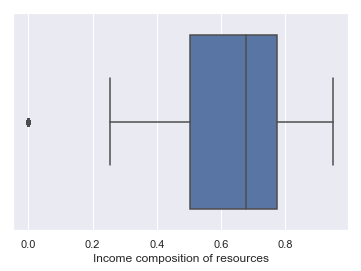

In [928]:
sns.boxplot(df1['Income composition of resources'])

In [930]:
df1['Schooling'].describe()

count    2928.000000
mean       12.016052
std         3.254407
min         0.000000
25%        10.300000
50%        12.300000
75%        14.100000
max        20.700000
Name: Schooling, dtype: float64

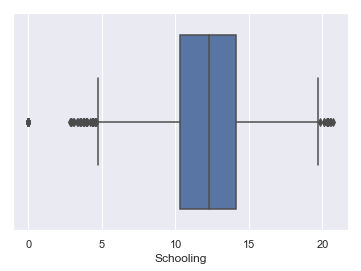

In [931]:
sns.boxplot(df1['Schooling'])

In [933]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [936]:
#continuous-continuous category

In [937]:
df1.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.079440,0.032723,0.206625,-0.081840,0.103833,-0.041980,0.100728,0.081928,0.139922,-0.138789,0.090698,-0.002443,-0.044555,-0.047597,0.235866,0.207311
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.398719,0.381864,0.191762,-0.157586,0.569926,-0.222529,0.454570,0.199583,0.469118,-0.556556,0.442637,-0.029241,-0.455801,-0.450549,0.688591,0.717314
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.197254,-0.242860,-0.101139,0.031176,-0.390369,0.094146,-0.270345,-0.102939,-0.271489,0.523821,-0.282564,0.001460,0.286246,0.291927,-0.436268,-0.435926
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114429,-0.085906,-0.194417,0.501038,-0.227851,0.996628,-0.166278,-0.126168,-0.170943,0.024955,-0.107121,0.532093,0.461110,0.466812,-0.141329,-0.192421
Alcohol,-0.079440,0.398719,-0.197254,-0.114429,1.000000,0.333114,0.022670,-0.050569,0.338431,-0.111488,0.225007,0.296116,0.222778,-0.047766,0.360366,-0.042092,-0.419184,-0.408421,0.420171,0.501994
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.333114,1.000000,-0.160547,-0.056831,0.232964,-0.088152,0.145572,0.161272,0.142111,-0.098230,0.821779,-0.041555,-0.246598,-0.248217,0.375234,0.387937
Hepatitis B,0.206625,0.191762,-0.101139,-0.194417,0.022670,-0.160547,1.000000,-0.138222,0.161587,-0.202863,0.389266,0.037714,0.477425,-0.092119,-0.106314,-0.090267,-0.086143,-0.094739,0.136477,0.145969
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.050569,-0.056831,-0.138222,1.000000,-0.175115,0.507718,-0.132291,-0.102798,-0.138031,0.030673,-0.077960,0.246993,0.223844,0.220152,-0.110884,-0.121817
BMI,0.103833,0.569926,-0.390369,-0.227851,0.338431,0.232964,0.161587,-0.175115,1.000000,-0.238522,0.278642,0.227776,0.277328,-0.243293,0.275503,-0.076096,-0.518267,-0.525378,0.489721,0.535044
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111488,-0.088152,-0.202863,0.507718,-0.238522,1.000000,-0.184140,-0.127090,-0.191279,0.037783,-0.110552,0.519395,0.462668,0.467216,-0.159022,-0.207801


In [961]:
x=list(df1[' BMI '])
y=list(df1['Life expectancy '])

Text(0.5, 1.0, 'BMI vs life expectancy')

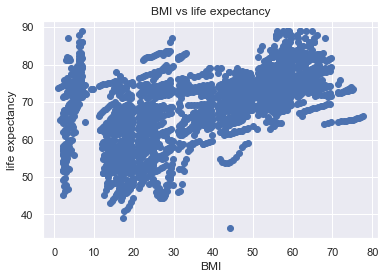

In [980]:
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('life expectancy')
plt.title('BMI vs life expectancy')

In [963]:
np.corrcoef(x,y)

array([[1.        , 0.56992605],
       [0.56992605, 1.        ]])

In [965]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'adult mortality rate vs life expectancy')

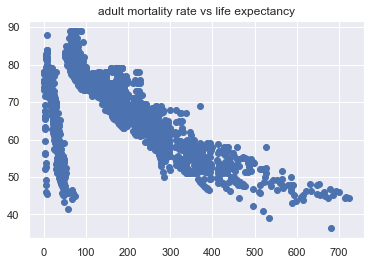

In [966]:
l=list(df1['Adult Mortality'])
plt.scatter(l,y)
plt.title('adult mortality rate vs life expectancy')

In [967]:
np.corrcoef(l,y)

array([[ 1.        , -0.69635931],
       [-0.69635931,  1.        ]])

Text(0.5, 1.0, 'Polio vaccination vs life expectancy')

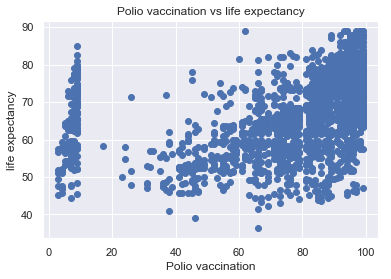

In [974]:
u=list(df1['Polio'])
plt.scatter(u,y)
plt.xlabel('Polio vaccination')
plt.ylabel('life expectancy')
plt.title('Polio vaccination vs life expectancy')

In [971]:
np.corrcoef(u,y)

array([[1.        , 0.45456958],
       [0.45456958, 1.        ]])

Text(0.5, 1.0, 'HIV/AIDS vs life expectancy')

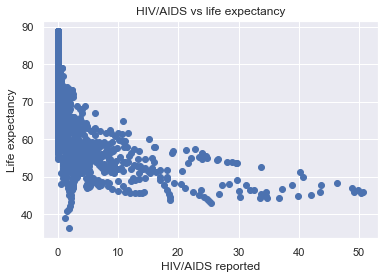

In [976]:
i=df1[' HIV/AIDS']
plt.scatter(i,y)
plt.xlabel('HIV/AIDS reported')
plt.ylabel('Life expectancy')
plt.title('HIV/AIDS vs life expectancy')

In [977]:
np.corrcoef(i,y)

array([[ 1.        , -0.55655625],
       [-0.55655625,  1.        ]])

Text(0.5, 1.0, 'thinness 1-19 years vs life expectancy')

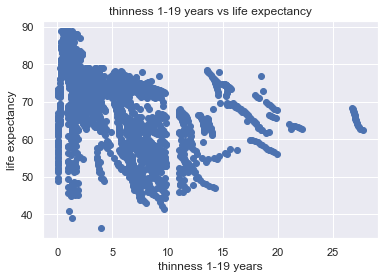

In [978]:
r=list(df1[' thinness  1-19 years'])
s=list(df1[' thinness 5-9 years'])
plt.scatter(r,y)
plt.xlabel('thinness 1-19 years')
plt.ylabel('life expectancy')
plt.title('thinness 1-19 years vs life expectancy')

In [979]:
np.corrcoef(r,y)

array([[ 1.        , -0.45580124],
       [-0.45580124,  1.        ]])

Text(0.5, 1.0, 'adult mortality vs HIV/AIDS')

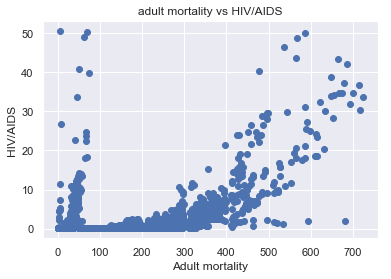

In [983]:
plt.scatter(l,i)
plt.xlabel('Adult mortality')
plt.ylabel('HIV/AIDS')
plt.title('adult mortality vs HIV/AIDS')

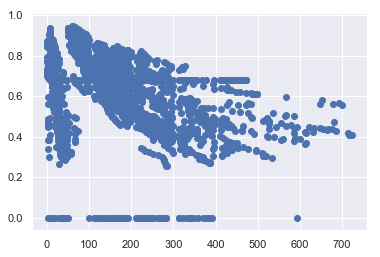

In [984]:
b=list(df1['Income composition of resources'])
plt.scatter(l, b)

In [ ]:
'Income composition of resources', 'Schooling'

In [1014]:
#Summary:
#When comparing continuous variables to each other,

#Increased adult mortality is seen with decreased life expectancy (moderate correlation). 
#Increased Adult mortality is seen with increased HIV/AIDS.  
#HIV/AIDS is seen with decreased life expectancy.  

#Increased income composition of resources and schooling are seen with decreased adult mortality, and
#increased life expectancy.  

#Increased income composition of resources and schooling
#are seen with increased GDP.  Increased GDP is seen with increased life expectancy (moderate correlation).
#Increased GDP has high, positive correlation with percentage expenditure, but increasing
#percentage expenditure does not seem to have correlation with life expectancy.

#Increased income composition of resources and schooling are shown with increased alchol consumption at a moderate
#correlation.  However, increased alcohol consumption didn't shown much correlation with life expectancy or adult
#mortality.  

#Increased income composition of resources and schooling are shown with increased BMI at a moderate correlation.
#Low BMI is shown with low life expectancy, but as BMI gets higher, life expectancy increases as well.
#however, when looking at the scatter plot BMI against life expectancy, it's hard to tell if
#the life expectancy reaches a plateau as BMI increases...

#Increasing thinness is seen with decreased life expectancy, increased infant death and under five death. 
#Increasing thinness is SOMEWHAT correlated with decreased schooling.
#So hard to say increasing schooling could decrease thinness, in turn, decrease number of death and increase
#life expectancy.  


#Increasing income composition of resources is highly correlated with increasing schooling.  
#Increased schooling is seen with increased vaccination (somewhat moderate correlation.  Perhaps getting
#vaccination is affected by other factors not listed in this data, such as religion, how much
#their country informs their people the importance/need for getting vaccinated, etc.).  Increasing polio
#vaccination is seen with increasing diphtheria vaccination.  Wonder if it's same people getting both 
#vaccinations).    
#However, increased income composition of resources did not show correlation with vaccination.
#Increased vaccination is seen with increased life expectancy (moderate correlation).

#Overall, life expectancy is shown to be correlated with adult mortality, BMI, polio, diphtheria, HIV/AIDS, GDP, 
#thinness, income and schooling.
#Schooling seems to be correlated with all those variables correlated with life expectancy, except HIV/AIDS.  

In [994]:
#two categorical variables: countries and status.

#categorical-categorical variable:
#183 countries. 151 countries developing. 32 countries developed.

In [1010]:
#countries with below the median life expectancy of 72 from the data: t
#total of 120 countries with life expectancy below the median 72.  From those 120 countries,
#only 5 of them are developed countries.

In [1008]:
t=list(extremely_low_life_expectancy['Country'].unique())
len(t)

120

In [1009]:
t

['Afghanistan',
 'Algeria',
 'Angola',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Latvia',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mali',
 'Mauritania',
 '

In [1000]:
k=df1.loc[df1['Life expectancy ']<72]
k['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [1006]:
df1.loc[(df1['Life expectancy ']<72) & (df1['Status']=='Developed')]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
397,Bulgaria,2002.0,Developed,71.8,157.0,1.0,10.20,33.267781,88.0,0.0,...,94.0,7.41,93.0,0.1,287.534843,7837161.0,2.4,2.4,0.723,12.9
398,Bulgaria,2001.0,Developed,71.6,16.0,1.0,10.72,25.062629,93.0,8.0,...,94.0,7.23,94.0,0.1,1764.973870,89142.0,2.4,2.5,0.713,12.9
399,Bulgaria,2000.0,Developed,71.1,163.0,1.0,9.69,15.235727,94.0,46.0,...,94.0,6.70,93.0,0.1,169.285860,817172.0,2.5,2.5,0.709,12.9
1169,Hungary,2000.0,Developed,71.7,193.0,1.0,12.22,75.362514,93.0,1.0,...,99.0,7.60,99.0,0.1,4623.467120,121971.0,2.3,2.3,0.761,13.9
1449,Latvia,2008.0,Developed,71.9,199.0,0.0,11.84,253.402234,93.0,3.0,...,94.0,6.63,94.0,0.1,16348.531210,2177322.0,2.3,2.4,0.819,16.3
1453,Latvia,2004.0,Developed,71.0,26.0,0.0,8.81,80.032837,98.0,0.0,...,99.0,6.51,99.0,0.1,6351.812500,2263122.0,2.5,2.6,0.776,15.5
1456,Latvia,2001.0,Developed,69.9,228.0,0.0,6.68,332.275171,96.0,1.0,...,97.0,6.17,97.0,0.1,3572.851300,233717.0,2.8,2.8,0.728,14.2
1457,Latvia,2000.0,Developed,71.0,218.0,0.0,7.13,291.017077,95.0,0.0,...,96.0,6.00,96.0,0.1,3352.731296,236755.0,2.8,2.8,0.716,13.7
1529,Lithuania,2008.0,Developed,71.1,224.0,0.0,13.30,1888.149904,96.0,1.0,...,96.0,6.61,96.0,0.1,14961.568180,3198231.0,2.9,2.9,0.820,16.5
1533,Lithuania,2004.0,Developed,71.6,24.0,0.0,12.10,76.361877,94.0,1.0,...,9.0,5.67,94.0,0.1,676.966998,337775.0,3.1,3.1,0.792,16.3


In [1017]:
u=pd.DataFrame(df1.groupby(['Country','Status'])['Adult Mortality'].mean().sort_values())

In [1018]:
#adult mortality, median was 144.  Below are 94 countries with adult mortality rate above 144.  
u.loc[u['Adult Mortality']>144]

,,Adult Mortality
Country,Status,
Sri Lanka,Developing,144.3750
Saint Lucia,Developing,146.2500
India,Developing,146.5625
Hungary,Developed,147.0625
Nepal,Developing,147.2500
Brazil,Developing,150.6875
Bahamas,Developing,152.0625
Saint Vincent and the Grenadines,Developing,152.0625
Grenada,Developing,153.7500


In [1021]:
df1.groupby('Country').mean().sort_values(by='Life expectancy ')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Sierra Leone,2007.5,46.11250,357.8125,27.5625,2.958125,29.105579,74.5000,673.8750,18.30625,41.8750,71.7500,9.385625,72.1250,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.23125
Central African Republic,2007.5,48.51250,333.0625,16.5000,1.155000,40.905543,42.2500,699.4375,17.08750,24.5000,41.3125,4.049375,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750
Lesotho,2007.5,48.78125,550.0625,4.5000,1.956875,82.118913,62.6875,266.6875,25.23750,6.3125,67.9375,7.233125,79.4375,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.65625
Angola,2007.5,49.01875,328.5625,83.7500,5.902500,102.100268,71.4375,3561.3125,18.01875,132.6250,46.1250,3.881250,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Malawi,2007.5,49.89375,424.4375,37.1250,0.862500,25.849706,86.3750,7559.4375,16.78125,58.7500,89.0625,6.953750,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.23125
Chad,2007.5,50.38750,227.7500,44.8750,0.386250,32.277320,23.4375,4687.7500,16.31875,78.1250,32.8750,4.331875,26.8125,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.08750
Côte d'Ivoire,2007.5,50.38750,417.3125,61.5000,2.660625,0.000000,60.0000,1708.2500,21.32500,86.8125,65.9375,5.723125,68.9375,4.68750,1434.330000,2.311000e+07,6.73750,6.69375,0.677000,12.30000
Zimbabwe,2007.5,50.48750,462.3750,26.5625,4.608125,20.364271,70.5625,923.0000,25.13750,40.8125,75.6250,6.176250,75.1875,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.82500
Swaziland,2007.5,51.32500,339.0000,2.6250,4.185000,278.099713,76.0000,49.1250,25.50000,3.6875,89.0000,7.430000,83.7500,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.35000


In [1024]:
#5 countries with lowest life expectancy: Sierra Leone, Central African Republic, Lesotho, Angola, Malawi.  
#those 5 countries had: below the median life expectancy(72), higher than the median adult mortality(144),
#below the mean BMI (38.0874), below the median polio(93) and median diphtheria(92.5) vaccination.
#their HIV/AIDS reports were higher than the median(0.1).  
#Their GDP was below the median gdp(1877.508125) except Angola.
#their thinness was higher than the median (3.3).
#Their income composition of resources was lower than the median (0.677).
#Their schooling was lower than the median (12.3)


#5 countries with highest life expectancy: France, Switzerland, Iceland, Sweden, Japan.
#France, Switzerland, Iceland, Sweden all had BMI in 50's, higher than the mean value of 38.0874.
#On the other hand, Japan had avg. BMI of 25.60625.  However, all of those 5 countries have thinness on the lower side.
#So Japan might have BMI below avg., but their thinness level is not concerning.  
#Except Iceland, other four countries had vaccination rate above the median level.
#HIV/AIDS all at the median level.
#GDP, income, schooling all above median.

#it looks like decreasing HIV/AIDS and improving HIV/AIDS treatment seem to be a global issue when
#reducing adult mortality and increasing life expectancy.

In [1026]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1058]:
features=['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [1059]:
x=df1.loc[:, features].values
y=df1.loc[:,['Life expectancy ']].values

In [1060]:
x=StandardScaler().fit_transform(x)

In [1061]:
pca=PCA(n_components=9)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2', 'principal component 3','principal component 4', 'principal component 5','principal component 6', 'principal component 7','principal component 8', 'principal component 9'])

In [1062]:
pca.explained_variance_ratio_

array([0.30349327, 0.14371798, 0.10277904, 0.07257783, 0.06706509,
       0.04658412, 0.04384336, 0.03999426, 0.03231422])

In [1063]:
#first four components only contain about 63.2% of info.
#we want at least 85%.
#first 6 components contain about 74.125% of info.
#first 8 components contain 82.13% of info.
#first 9 components: 85.2% of info.

In [1069]:
loading_scores=pd.Series(pca.components_[0], index=features)

In [1072]:
#0.3: thinness,schooling,income  --- played most role in separating the samples
#0.2: BMI, under-five deaths, alcohol,infant deaths, GDP, Diphtheria, adult mortality, polio, percentage expenditure
#0.1: measles, total expenditure, HIV/AIDS, population, hep B. 

In [1070]:
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

In [1071]:
top_18=sorted_loading_scores[0:18].index.values
print(loading_scores[top_18])

 thinness  1-19 years              0.323183
 thinness 5-9 years                0.322978
Schooling                         -0.322923
Income composition of resources   -0.302859
 BMI                              -0.290597
under-five deaths                  0.242768
Alcohol                           -0.240021
infant deaths                      0.237452
GDP                               -0.228871
Diphtheria                        -0.225442
Adult Mortality                    0.224843
Polio                             -0.221700
percentage expenditure            -0.208001
Measles                            0.153064
Total expenditure                 -0.147345
 HIV/AIDS                          0.140413
Population                         0.118634
Hepatitis B                       -0.112937
dtype: float64
